In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as up
from mpl_toolkits.mplot3d import Axes3D
from stl import mesh
from mpl_toolkits import mplot3d
import scipy.stats as stats
import os

#import ParticlePlottingFunctions
import ParticlePlottingFunctions as ppf
%load_ext autoreload
%autoreload 2

In [2]:
file1 = "runs/5UCN_SCMstart.root"

#get our two different data folders already for ease
config = up.open(file1+":config")
Nend = up.open(file1+":neutronend")
Nsnapshot = up.open(file1+":neutronsnapshot")
Ntrack = up.open(file1+":neutrontrack")

'5'

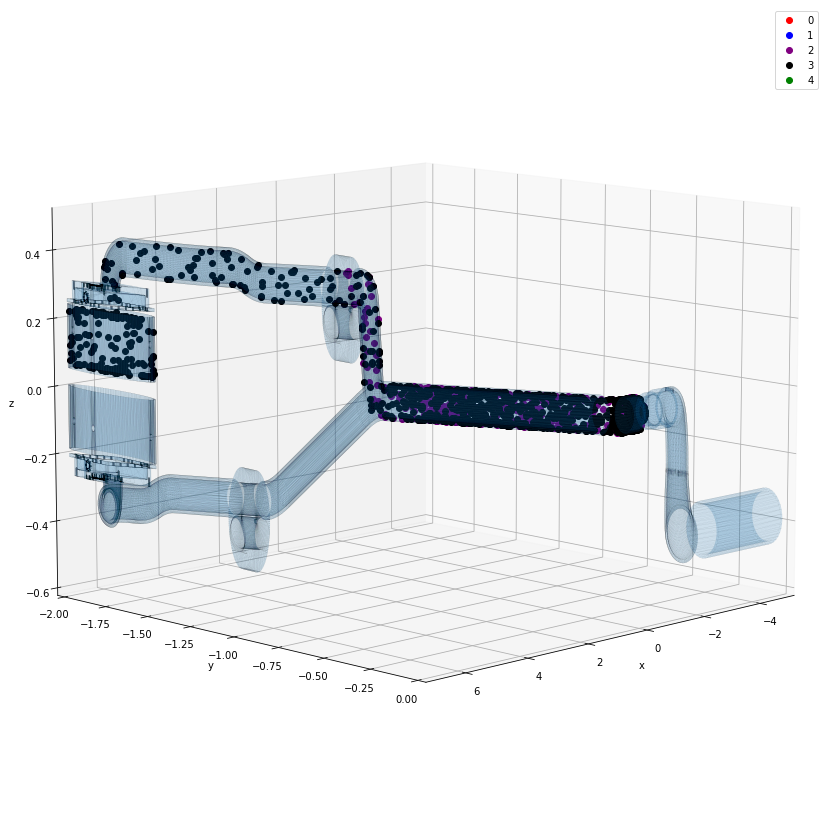

In [43]:
# %matplotlib inline 
#lets you move the graph around within jupyter lab
# %matplotlib widget

numParticles = int(config["GLOBAL/simcount;1"][:].split()[0])

particleTrack_one = Ntrack.arrays(['particle', 'polarisation', 't', 'x', 'y', 'z', 'vx', 'vy', 'vz', 
                        'H', 'E', 'Bx', 'dBxdx', 'dBxdy', 'dBxdz', 'By', 'dBydx', 'dBydy', 
                                       'dBydz', 'Bz', 'dBzdx', 'dBzdy', 'dBzdz'], f"(particle=={0}) & (x > 0)", library="np")

x = particleTrack_one['x'].astype(float)
y = particleTrack_one['y'].astype(float)
z = particleTrack_one['z'].astype(float)
times = particleTrack_one['t'].astype(float)
k = np.ones(len(x))*particle_num

figVals = ppf.plot3D(x, y, z, label="0", startPlot=True, ls="", 
                              endPlot=False, size=(15,15), c='red')
fig, axis = figVals

colors = ['blue', 'purple', 'black', 'green', 'orange']

for particle_num in range(1, numParticles):

    particleTrack_one = Ntrack.arrays(['particle', 'polarisation', 't', 'x', 'y', 'z', 'vx', 'vy', 'vz', 
                        'H', 'E', 'Bx', 'dBxdx', 'dBxdy', 'dBxdz', 'By', 'dBydx', 'dBydy', 
                                       'dBydz', 'Bz', 'dBzdx', 'dBzdy', 'dBzdz'], f"(particle=={particle_num}) & (x > 0)", library="np")

    x = particleTrack_one['x'].astype(float)
    y = particleTrack_one['y'].astype(float)
    z = particleTrack_one['z'].astype(float)
    times = particleTrack_one['t'].astype(float)

    figVals = ppf.plot3D(x, y, z, label=f"{particle_num}", startPlot=False, ls="", 
                                  endPlot=False, size=(15,15), figVals=[fig, axis], c=colors[particle_num-1])
    fig, axis = figVals

axis.view_init(elev=10., azim=45)
# axis.view_init(elev=0., azim=90)

#loads all the file I have in this folder as STLs
STLpath = 'STLsToGraph'
stl_array = os.listdir(STLpath)

for STLfile in stl_array:
    ppf.graphSTL(STLpath+'/'+STLfile, axis)

#removes repeated legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axis.legend(by_label.values(), by_label.keys())

# cb.ax.tick_params(labelsize=20)
# plt.tight_layout()
plt.show()